# Rekognition 서비스 사용

* AmazonRekognitionFullAccess 권한 보유할 것
* 사용자 생성시 프로그래밍 방식 액세스 권한이 할당되어 있고,
* 액세스 키, 비밀 액세스 키 정보가 로컬 컴퓨터에 설정되어 있어야 함.
* 로컬 컴퓨터에 설정 방법
    * "C:\Users\<사용자명>\.aws\credentials" 파일 열고
    * aws_access_key_id와 aws_secret_access_key 부여받은 값으로 설정

## AWS SDK for python 인스톨

In [1]:
%pip install --upgrade boto3

Note: you may need to restart the kernel to use updated packages.


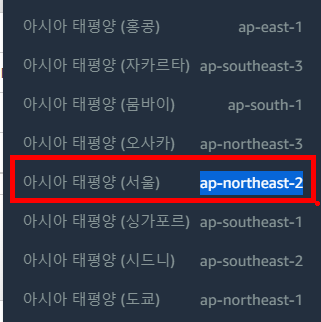

In [2]:
#연결 확인
import boto3


client = boto3.client('s3',region_name='ap-northeast-2')
client.list_buckets()

{'ResponseMetadata': {'RequestId': 'FYBM93AREXRJ5VSN',
  'HostId': 'Rw+TFOXlHnsvz2VgU5NpnL7EQNKl5xyj10Q3QYATUmveP5gk4g/LHG7eCPlossmX/xFGEXQCyPM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Rw+TFOXlHnsvz2VgU5NpnL7EQNKl5xyj10Q3QYATUmveP5gk4g/LHG7eCPlossmX/xFGEXQCyPM=',
   'x-amz-request-id': 'FYBM93AREXRJ5VSN',
   'date': 'Tue, 04 Apr 2023 03:34:15 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'aws-12012',
   'CreationDate': datetime.datetime(2023, 4, 4, 0, 54, 45, tzinfo=tzutc())},
  {'Name': 'aws-stu11',
   'CreationDate': datetime.datetime(2023, 4, 4, 1, 23, 43, tzinfo=tzutc())},
  {'Name': 'aws.ai.bucket17',
   'CreationDate': datetime.datetime(2023, 4, 4, 0, 49, 57, tzinfo=tzutc())},
  {'Name': 'aws.ai.sesac.bucket',
   'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 1, tzinfo=tzutc())},
  {'Name': 'aws.ai.sesac.expert.callsign.mvrick',
   'CreationDate': date

> 에러가 나오지 않고 결과가 표시되면 SDK 인스톨 및 인증 정보의 저장이 완료되어 SDK를 사용해 API를 조작할 수 있음

## Amazon Rekognition

* 이미지, 동영상을 분석하기 위한 서비스
* 이미지 전용 서비스를 Rekognition Image
* 동영상 전용 서비스를 Rekognition Video라고 부릅니다. 
* 이미 학습 완료된 모델이 제공되고 있습니다. 

[할 수 있는 것]
* 이미지나 동영상 속의 사물 및 장면 인식
* 이미지 및 동영상에서 얼굴 인식 및 분석(미리 등록해 둔 얼굴 인식 포함)
* 동영상에서 인물 추적
* 이미지에 포함된 텍스트 인식


[API 문서]
https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/rekognition.html

[데모]

https://ap-southeast-2.console.aws.amazon.com/rekognition/home?region=ap-southeast-2#/label-detection


### 이미지를 이용한 사물 인식

In [3]:
import boto3

#rekognition 서비스명 지정
client = boto3.client('rekognition',region_name='ap-northeast-2')
client

In [4]:
# 해파리 인식
# 본 파일(.ipynb)와 같은 위치에 이미지 파일 놓을것!
# jpg, png만 가능}

with open('jellyfish.jpg','rb') as image_file:
    bytes_data = image_file.read() #바이트로 읽을 것
    

In [5]:
response = client.detect_labels(Image={'Bytes':bytes_data}) #내부적으로 Base64로 인코딩을 하므로 바이트 데이터로 전달해야함
# print(json.dumps(response,indent=2))
response

{'Labels': [{'Name': 'Animal',
   'Confidence': 95.51139831542969,
   'Instances': [],
   'Parents': [],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Sea Life',
   'Confidence': 95.51139831542969,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Invertebrate',
   'Confidence': 89.27242279052734,
   'Instances': [],
   'Parents': [{'Name': 'Animal'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Jellyfish',
   'Confidence': 89.27242279052734,
   'Instances': [],
   'Parents': [{'Name': 'Animal'},
    {'Name': 'Invertebrate'},
    {'Name': 'Sea Life'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Aquatic',
   'Confidence': 87.78662872314453,
   'Instances': [],
   'Parents': [{'Name': 'Water'}],
   'Aliases': [],
   'Categories': [{'Name': 'Animals and Pets'}]},
  {'Name': 'Water',
   'Confidence':

In [6]:
response['Labels'][0]

{'Name': 'Animal',
 'Confidence': 95.51139831542969,
 'Instances': [],
 'Parents': [],
 'Aliases': [],
 'Categories': [{'Name': 'Animals and Pets'}]}

In [7]:
for label in response['Labels']:
    name=label['Name']
    confidence=label['Confidence']
    print(f'{name}:{confidence:.3f}%')

Animal:95.511%
Sea Life:95.511%
Invertebrate:89.272%
Jellyfish:89.272%
Aquatic:87.787%
Water:87.787%
Insect:72.462%
Outdoors:71.272%
Nature:62.164%
Reef:55.770%
Sea:55.770%


In [8]:
# Animal:95.51% 형식으로 출력해 보기

import json

#response 

for label in response['Labels']:
    print(f"{label['Name']}:{label['Confidence']:.2f}%")

Animal:95.51%
Sea Life:95.51%
Invertebrate:89.27%
Jellyfish:89.27%
Aquatic:87.79%
Water:87.79%
Insect:72.46%
Outdoors:71.27%
Nature:62.16%
Reef:55.77%
Sea:55.77%


### 이미지를 이용한 얼굴 인식

[얼굴 속성]

https://docs.aws.amazon.com/rekognition/latest/APIReference/API_FaceDetail.html

In [9]:
import boto3
import json

client = boto3.client('rekognition',region_name='ap-northeast-2')
# 차은우 인식
with open('ybyb.png','rb') as image_file:
    bytes_data = image_file.read() #바이트로 읽을 것

    #얼굴인식(100명까지 인식)
    #Attributes:ALL,DEFAULT
    ## ALL: 연령,웃는얼굴인지여부 등 다양한 항목까지 인식
    ## DEFAULT: 얼굴위치, 눈, 귀 위치
    
    response = client.detect_faces(Image={'Bytes':bytes_data},Attributes=['ALL']) 
    
response

{'FaceDetails': [{'BoundingBox': {'Width': 0.5968905091285706,
    'Height': 0.6957951188087463,
    'Left': 0.22362832725048065,
    'Top': 0.2579226791858673},
   'AgeRange': {'Low': 12, 'High': 20},
   'Smile': {'Value': False, 'Confidence': 91.27172088623047},
   'Eyeglasses': {'Value': False, 'Confidence': 97.44129943847656},
   'Sunglasses': {'Value': False, 'Confidence': 99.99658203125},
   'Gender': {'Value': 'Female', 'Confidence': 99.99878692626953},
   'Beard': {'Value': False, 'Confidence': 95.82156372070312},
   'Mustache': {'Value': False, 'Confidence': 98.39928436279297},
   'EyesOpen': {'Value': True, 'Confidence': 88.44145202636719},
   'MouthOpen': {'Value': False, 'Confidence': 95.0329360961914},
   'Emotions': [{'Type': 'CALM', 'Confidence': 94.95515441894531},
    {'Type': 'SURPRISED', 'Confidence': 6.387671947479248},
    {'Type': 'FEAR', 'Confidence': 6.061522960662842},
    {'Type': 'SAD', 'Confidence': 2.6224238872528076},
    {'Type': 'HAPPY', 'Confidence': 1.

In [10]:
response.keys()

dict_keys(['FaceDetails', 'ResponseMetadata'])

In [11]:
#차은우 나이대 출력하기 

response['FaceDetails'][0].keys()


dict_keys(['BoundingBox', 'AgeRange', 'Smile', 'Eyeglasses', 'Sunglasses', 'Gender', 'Beard', 'Mustache', 'EyesOpen', 'MouthOpen', 'Emotions', 'Landmarks', 'Pose', 'Quality', 'Confidence'])

In [12]:
response['FaceDetails'][0]['AgeRange']

{'Low': 12, 'High': 20}

In [13]:
age_range=response['FaceDetails'][0]['AgeRange']
age_low=age_range['Low']
age_high=age_range['High']

print(age_low, age_high)
print(f"김예빈 나이대는 {age_low}~{age_high}로 보인다.")

12 20
김예빈 나이대는 12~20로 보인다.


In [14]:
#차은우 감정은?

for label in response['FaceDetails']:
    print(f"{label['Emotions']}")


[{'Type': 'CALM', 'Confidence': 94.95515441894531}, {'Type': 'SURPRISED', 'Confidence': 6.387671947479248}, {'Type': 'FEAR', 'Confidence': 6.061522960662842}, {'Type': 'SAD', 'Confidence': 2.6224238872528076}, {'Type': 'HAPPY', 'Confidence': 1.3427433967590332}, {'Type': 'DISGUSTED', 'Confidence': 0.7761014699935913}, {'Type': 'ANGRY', 'Confidence': 0.374390184879303}, {'Type': 'CONFUSED', 'Confidence': 0.3543752431869507}]


In [15]:
response['FaceDetails'][0]['Emotions']

[{'Type': 'CALM', 'Confidence': 94.95515441894531},
 {'Type': 'SURPRISED', 'Confidence': 6.387671947479248},
 {'Type': 'FEAR', 'Confidence': 6.061522960662842},
 {'Type': 'SAD', 'Confidence': 2.6224238872528076},
 {'Type': 'HAPPY', 'Confidence': 1.3427433967590332},
 {'Type': 'DISGUSTED', 'Confidence': 0.7761014699935913},
 {'Type': 'ANGRY', 'Confidence': 0.374390184879303},
 {'Type': 'CONFUSED', 'Confidence': 0.3543752431869507}]

In [16]:
#차은우는 웃고 있나요? (몇 퍼센트 확률?)

for label in response['FaceDetails']:
    print(f"{label['Smile']}")


{'Value': False, 'Confidence': 91.27172088623047}


In [17]:
response['FaceDetails'][0]['Smile']

{'Value': False, 'Confidence': 91.27172088623047}

In [18]:
#차은우는 남자인가요?

for label in response['FaceDetails']:
    print(f"{label['Gender']}")


{'Value': 'Female', 'Confidence': 99.99878692626953}


In [19]:
#해파리는 사람인가요?

with open('jellyfish.jpg','rb') as image_file:
    bytes_data = image_file.read() #바이트로 읽을 것

jelly = client.detect_faces(Image={'Bytes':bytes_data},Attributes=['ALL']) 
jelly


{'FaceDetails': [],
 'ResponseMetadata': {'RequestId': '46ae8dfe-f9a6-4650-8437-33039c053b27',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '46ae8dfe-f9a6-4650-8437-33039c053b27',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '18',
   'date': 'Tue, 04 Apr 2023 03:34:35 GMT'},
  'RetryAttempts': 0}}

### 여러명의 얼굴 인식

client.detect_faces()

In [20]:
import boto3
import json

client = boto3.client('rekognition',region_name='ap-northeast-2')
# 블랙핑크 인식
with open('blackpink.jpg','rb') as image_file:
    bytes_data = image_file.read() #바이트로 읽을 것

    #얼굴인식(100명까지 인식)
    #Attributes:ALL,DEFAULT
    ## ALL: 연령,웃는얼굴인지여부 등 다양한 항목까지 인식
    ## DEFAULT: 얼굴위치, 눈, 귀 위치
    
    response = client.detect_faces(Image={'Bytes':bytes_data},Attributes=['ALL']) 

print(json.dumps(response,indent=2))

{
  "FaceDetails": [
    {
      "BoundingBox": {
        "Width": 0.048271384090185165,
        "Height": 0.06498199701309204,
        "Left": 0.7428660988807678,
        "Top": 0.47563180327415466
      },
      "AgeRange": {
        "Low": 10,
        "High": 18
      },
      "Smile": {
        "Value": false,
        "Confidence": 94.85550689697266
      },
      "Eyeglasses": {
        "Value": false,
        "Confidence": 96.70205688476562
      },
      "Sunglasses": {
        "Value": false,
        "Confidence": 99.99605560302734
      },
      "Gender": {
        "Value": "Female",
        "Confidence": 99.99508666992188
      },
      "Beard": {
        "Value": false,
        "Confidence": 94.18022918701172
      },
      "Mustache": {
        "Value": false,
        "Confidence": 98.10590362548828
      },
      "EyesOpen": {
        "Value": true,
        "Confidence": 97.05109405517578
      },
      "MouthOpen": {
        "Value": false,
        "Confidence": 91.473327

In [21]:
# 몇 명이 인식되었나?

len(response['FaceDetails'])



4

In [22]:
for i in range(len(response['FaceDetails'])):
    age_range=response['FaceDetails'][0]['AgeRange']
    age_low=age_range['Low']
    age_high=age_range['High']
    smile=response['FaceDetails'][0]['Smile']
    smile_tf=smile['Value']
    Gender=response['FaceDetails'][0]['Gender']
    Gender_tf=smile['Value']

    print(f'Age:{age_low}~{age_high}, Smaile:{smile_tf}, Gender:{Gender_tf}')

Age:10~18, Smaile:False, Gender:False
Age:10~18, Smaile:False, Gender:False
Age:10~18, Smaile:False, Gender:False
Age:10~18, Smaile:False, Gender:False


In [23]:
for i in response['FaceDetails']:
    age_low=i['AgeRange']['Low']
    age_low=i['AgeRange']['High']
    smile=i['Smile']['Value']
    Gender=i['Gender']['Value']

    print(f'Age:{age_low}~{age_high}, Smaile:{smile}, Gender:{Gender}')

Age:18~18, Smaile:False, Gender:Female
Age:22~18, Smaile:False, Gender:Female
Age:18~18, Smaile:False, Gender:Female
Age:22~18, Smaile:False, Gender:Female


In [24]:
# 블랙핑크 연령대, 웃음유무, 성별 출력하기


for i in response['FaceDetails']:
    age_low=i['AgeRange']['Low']
    age_low=i['AgeRange']['High']
    smile=i['Smile']['Value']
    Gender=i['Gender']['Value']

    print(f'Age:{age_low}~{age_high}, Smaile:{smile}, Gender:{Gender}')


Age:18~18, Smaile:False, Gender:Female
Age:22~18, Smaile:False, Gender:Female
Age:18~18, Smaile:False, Gender:Female
Age:22~18, Smaile:False, Gender:Female


In [25]:
# 4명의 바운딩박스 값 찾기


for i in response['FaceDetails']:
    Left=i['BoundingBox']['Left']
    Top=i['BoundingBox']['Top']
    Width=i['BoundingBox']['Width']
    Height=i['BoundingBox']['Height']

    print(f'{Left}, {Top}, {Width}, {Height}')


0.7428660988807678, 0.47563180327415466, 0.048271384090185165, 0.06498199701309204
0.41513732075691223, 0.2021334022283554, 0.04316040128469467, 0.056011274456977844
0.5906916260719299, 0.2117750644683838, 0.04281727969646454, 0.05425133928656578
0.30513274669647217, 0.38863274455070496, 0.03980901092290878, 0.05814318358898163


## 얼굴에 사각형 그리기

### CV2로 사각형 그리기

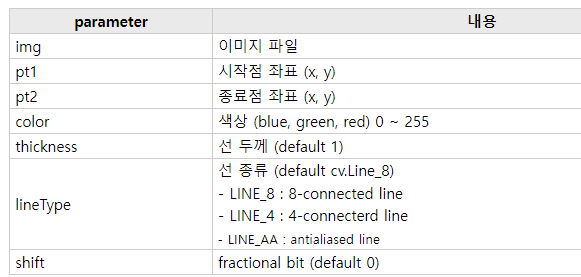

In [26]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [27]:
import cv2
cv2.__version__

'4.7.0'

In [28]:
import cv2
import numpy as np

blue_color = (255,0,0)
green_color = (0,255,0)
red_color = (0,0,255)

img = np.zeros((384,384,3),np.uint8) #0로 다 채워져 있기 때문에 검은색 이미지
img = cv2.rectangle(img,(10,10),(100,100),blue_color,3)
img = cv2.rectangle(img,(110,110),(200,200),green_color,3)
img = cv2.rectangle(img,(210,210),(350,350),red_color,3)

cv2.imshow('rectangle',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Bounding Box

https://docs.aws.amazon.com/ko_kr/rekognition/latest/dg/images-displaying-bounding-boxes.html

BoundingBox에는 다음과 같은 속성이 있습니다.

* 높이 — 전체 이미지 높이에 대한 비율로서 경계 상자의 높이입니다.
* 좌측 — 전체 이미지 너비에 대한 비율로서 경계 상자의 좌측 좌표입니다.
* 상단 — 전체 이미지 높이에 대한 비율로서 경계 상자의 상단 좌표입니다.
* 너비 — 전체 이미지 너비에 대한 비율로서 경계 상자의 너비입니다.
* 0~1 사이의 값을 가집니다. 

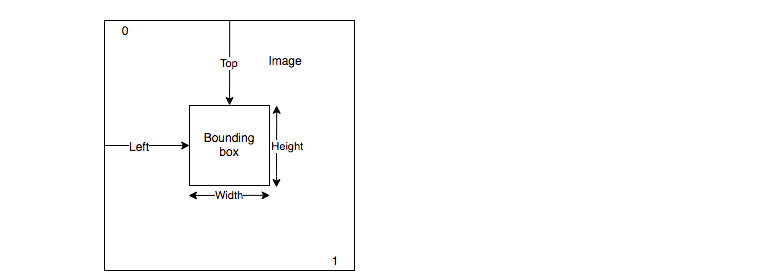

In [29]:
import cv2

img_color = cv2.imread('blackpink.jpg',cv2.IMREAD_COLOR)
img_height,img_width,_ = img_color.shape # 원본 이미지의 높이, 너비

img_color.shape

(600, 600, 3)

In [30]:
start_point = tuple()
end_point = tuple()

for item in response['FaceDetails']:    
    width = int(img_width * item['BoundingBox']['Width'] )
    height = int(img_height * item['BoundingBox']['Height'])
    left = int(img_width * item['BoundingBox']['Left'])
    top = int(img_height * item['BoundingBox']['Top'])

    start_point =(left,top)
    end_point =(left+ width,top+ height)
    
    print(start_point,end_point)

(445, 285) (473, 323)
(249, 121) (274, 154)
(354, 127) (379, 159)
(183, 233) (206, 267)


In [31]:
print(start_point,end_point)

(183, 233) (206, 267)


In [32]:
#블랙핑크 출력

import cv2

img_color = cv2.imread('blackpink.jpg',cv2.IMREAD_COLOR)
cv2.imshow('color image',img_color) 

# Waits for a keystroke
cv2.waitKey(0)
cv2.destroyAllWindows()


In [33]:
#바운딩 박스 적용한 사진
import cv2

img_color = cv2.imread('blackpink.jpg',cv2.IMREAD_COLOR)
#바운딩 박스 그리기
cv2.rectangle(img_color, start_point, end_point, (0, 0, 255), thickness= 2, lineType=cv2.LINE_4) 

# display the output
cv2.imshow('img_color', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
start_point[1]

233

## 4명 모두 바운딩 박스 처리

In [35]:


#바운딩 박스 적용한 사진
import cv2

img_color = cv2.imread('blackpink.jpg',cv2.IMREAD_COLOR)
#바운딩 박스 그리기

for item in response['FaceDetails']:    
    width = int(img_width * item['BoundingBox']['Width'] )
    height = int(img_height * item['BoundingBox']['Height'])
    left = int(img_width * item['BoundingBox']['Left'])
    top = int(img_height * item['BoundingBox']['Top'])

    start_point =(left,top)
    end_point =(left+ width,top+ height)
    
    print(start_point,end_point)
    
    cv2.rectangle(img_color, start_point, end_point, (0, 0, 255), thickness= 2, lineType=cv2.LINE_4) 


# display the output
cv2.imshow('img_color', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()








(445, 285) (473, 323)
(249, 121) (274, 154)
(354, 127) (379, 159)
(183, 233) (206, 267)


### 바운딩 박스에 라벨 적용한 사진

In [36]:

import cv2

img_color = cv2.imread('blackpink.jpg',cv2.IMREAD_COLOR)

#바운딩 박스 그리기

for item in response['FaceDetails']:    
    width = int(img_width * item['BoundingBox']['Width'] )
    height = int(img_height * item['BoundingBox']['Height'])
    left = int(img_width * item['BoundingBox']['Left'])
    top = int(img_height * item['BoundingBox']['Top'])

    start_point =(left,top)
    end_point =(left+ width,top+ height)
    
    print(start_point,end_point)
    
    cv2.rectangle(img_color, start_point, end_point, (0, 0, 255), thickness= 2, lineType=cv2.LINE_4) 

#라벨 추가하기

for item in response['FaceDetails']:    
    width = int(img_width * item['BoundingBox']['Width'] )
    height = int(img_height * item['BoundingBox']['Height'])
    left = int(img_width * item['BoundingBox']['Left'])
    top = int(img_height * item['BoundingBox']['Top'])

    start_point =(left,top)
    end_point =(left+ width,top+ height)
    
    print(start_point,end_point)
    
    label = "female"
    cv2.putText(img_color, label, (start_point[0],start_point[1]-10),   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# display the output
cv2.imshow('img_color', img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

(445, 285) (473, 323)
(249, 121) (274, 154)
(354, 127) (379, 159)
(183, 233) (206, 267)
(445, 285) (473, 323)
(249, 121) (274, 154)
(354, 127) (379, 159)
(183, 233) (206, 267)
